In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import requests
import matplotlib
import wget
import re
from sodapy import Socrata

#'Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 
#'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 
#'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid',
#'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel',
#'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10'
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

idx_pd = pd.IndexSlice

**GUTHUB REPO**
https://e.infogram.com/01266038-4580-4cf0-baab-a532bd968d0c?parent_url=https%3A%2F%2Fwww.ins.gov.co%2FNoticias%2FPaginas%2FCoronavirus.aspx&src=embed#

In [10]:
client = Socrata("www.datos.gov.co", None)
results = client.get("gt2j-8ykr", limit=10000)
df = pd.DataFrame.from_records(results)

In [11]:
df = df.set_index('id_de_caso')

In [14]:
df

,fecha_de_notificaci_n,codigo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,fecha_de_muerte
id_de_caso,,,,,,,,,,,,,,,
1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27T00:00:00.000,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,NaN
2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04T00:00:00.000,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,NaN
3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29T00:00:00.000,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,NaN
4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,COLOMBIA,2020-03-06T00:00:00.000,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,NaN
5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,COLOMBIA,2020-03-08T00:00:00.000,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,2020-04-06T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,51,F,En Estudio,Leve,COLOMBIA,2020-03-15T00:00:00.000,2020-04-20T00:00:00.000,NaN,2020-04-20T00:00:00.000,NaN
3974,2020-04-06T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,18,F,En Estudio,Leve,COLOMBIA,2020-03-28T00:00:00.000,2020-04-20T00:00:00.000,NaN,2020-04-20T00:00:00.000,NaN
3975,2020-04-06T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,43,M,En Estudio,Leve,COLOMBIA,2020-03-15T00:00:00.000,2020-04-20T00:00:00.000,NaN,2020-04-20T00:00:00.000,NaN


In [15]:
#df[['Day', 'Month', 'Year']] = df['fecha_diagnostico'].str.split("/", expand=True)

In [ ]:
#df['Day'] = df['Day'].astype(int)
#df['Month'] = df['Month'].astype(int)

In [ ]:
#df['Year'] = ('20' + df['Year'].str[-2:])

In [ ]:
#df['Fecha'] = df['Day'].astype(str)+ '/' + df['Month'].astype(str) + '/' + df['Year']

In [17]:
df['Fecha'] =  pd.to_datetime(df['fecha_diagnostico'], format='%Y/%m/%d')

In [18]:
df['edad'] = df['edad'].astype(str)

In [19]:
df['atenci_n'].unique()

array(['Recuperado', 'Casa', 'Fallecido', 'Hospital', 'Hospital UCI',
       'casa'], dtype=object)

In [21]:
df['activos'] = ~df['atenci_n'].isin(['Recuperado', 'Fallecido'])

# Total cases

## By Department

In [25]:
total_cases = df.groupby(["departamento", "Fecha"])['edad'].count()\
                    .groupby(level=[0]).cumsum().to_frame().rename(columns={'edad': 'Casos Totales'})
total_cases = total_cases.sort_index(level=[0, 1])
total_cases = total_cases.unstack(1).fillna(method='ffill', axis=1)
total_cases = total_cases.sort_values(by=total_cases.columns[-1], ascending=False)
total_cases.head(10)

Casos Totales                                   \
Fecha                    2020-03-06 2020-03-09 2020-03-11 2020-03-12   
departamento                                                           
Bogotá D.C.                     1.0        1.0        3.0        5.0   
Valle del Cauca                 NaN        1.0        1.0        1.0   
Antioquia                       NaN        1.0        4.0        4.0   
Cartagena D.T. y C.             NaN        NaN        1.0        1.0   
Cundinamarca                    NaN        NaN        NaN        NaN   
Risaralda                       NaN        NaN        NaN        NaN   
Barranquilla D.E.               NaN        NaN        NaN        NaN   
Huila                           NaN        NaN        NaN        3.0   
Santa Marta D.T. y C.           NaN        NaN        NaN        NaN   
Norte de Santander              NaN        NaN        NaN        NaN   

                                                                              \
Fecha                 2020-03-13 2020-03-14 2020-03-15 2020-03-16 2020-03-17   
departamento                                                                   
Bogotá D.C.                  6.0       16.0       27.0       32.0       39.0   
Valle del Cauca              3.0        3.0        3.0        5.0       13.0   
Antioquia                    4.0        7.0        8.0        8.0        8.0   
Cartagena D.T. y C.          1.0        1.0        3.0        5.0        6.0   
Cundinamarca                 NaN        NaN        2.0        2.0        4.0   
Risaralda                    NaN        1.0        1.0        1.0        2.0   
Barranquilla D.E.            NaN        NaN        NaN        2.0        2.0   
Huila                        3.0        7.0        7.0        7.0        8.0   
Santa Marta D.T. y C.        NaN        NaN        NaN        NaN        NaN   
Norte de Santander           NaN        NaN        1.0        1.0        3.0   

                                                                              \
Fecha                 2020-03-18 2020-03-19 2020-03-20 2020-03-21 2020-03-22   
departamento                                                                   
Bogotá D.C.                 44.0       52.0       80.0       85.0       89.0   
Valle del Cauca             13.0       14.0       15.0       27.0       32.0   
Antioquia                    8.0       11.0       22.0       25.0       30.0   
Cartagena D.T. y C.          9.0       10.0       11.0       15.0       15.0   
Cundinamarca                 4.0        5.0        9.0       11.0       11.0   
Risaralda                    5.0        5.0        6.0        7.0       12.0   
Barranquilla D.E.            2.0        5.0        5.0        7.0        7.0   
Huila                        8.0        9.0        9.0       10.0       10.0   
Santa Marta D.T. y C.        NaN        NaN        2.0        2.0        2.0   
Norte de Santander           3.0        6.0        6.0        8.0        8.0   

                                                                              \
Fecha                 2020-03-23 2020-03-24 2020-03-25 2020-03-26 2020-03-27   
departamento                                                                   
Bogotá D.C.                118.0      159.0      175.0      182.0      220.0   
Valle del Cauca             38.0       67.0       72.0       74.0       74.0   
Antioquia                   52.0       52.0       60.0       60.0       60.0   
Cartagena D.T. y C.         16.0       21.0       26.0       26.0       26.0   
Cundinamarca                16.0       23.0       24.0       24.0       25.0   
Risaralda                   13.0       16.0       18.0       18.0       18.0   
Barranquilla D.E.            7.0        9.0       12.0       12.0       13.0   
Huila                       11.0       14.0       14.0       14.0       14.0   
Santa Marta D.T. y C.        3.0        3.0        4.0        4.0        7.0   
Norte de Santander           8.0       11.0

## By City

In [24]:
total_cases_city = df.groupby(["ciudad_de_ubicaci_n", "Fecha"])['edad'].count()\
                    .groupby(level=[0]).cumsum().to_frame().rename(columns={'edad': 'Casos Totales'})
total_cases_city = total_cases_city.sort_index(level=[0, 1])
total_cases_city = total_cases_city.unstack(1).fillna(method='ffill', axis=1)
total_cases_city = total_cases_city.sort_values(by=total_cases_city.columns[-1], ascending=False)
total_cases_city.head(10)

Casos Totales                                              \
Fecha                  2020-03-06 2020-03-09 2020-03-11 2020-03-12 2020-03-13   
ciudad_de_ubicaci_n                                                             
Bogotá D.C.                   1.0        1.0        3.0        5.0        6.0   
Cali                          NaN        NaN        NaN        NaN        1.0   
Medellín                      NaN        1.0        3.0        3.0        3.0   
Cartagena de Indias           NaN        NaN        1.0        1.0        1.0   
Pereira                       NaN        NaN        NaN        NaN        NaN   
Barranquilla                  NaN        NaN        NaN        NaN        NaN   
Santa Marta                   NaN        NaN        NaN        NaN        NaN   
Neiva                         NaN        NaN        NaN        3.0        3.0   
Villavicencio                 NaN        NaN        NaN        NaN        1.0   
Cúcuta                        NaN        NaN        NaN        NaN        NaN   

                                                                            \
Fecha               2020-03-14 2020-03-15 2020-03-16 2020-03-17 2020-03-18   
ciudad_de_ubicaci_n                                                          
Bogotá D.C.               16.0       27.0       32.0       39.0       44.0   
Cali                       1.0        1.0        3.0        8.0        8.0   
Medellín                   5.0        6.0        6.0        6.0        6.0   
Cartagena de Indias        1.0        3.0        5.0        6.0        9.0   
Pereira                    NaN        NaN        NaN        1.0        3.0   
Barranquilla               NaN        NaN        2.0        2.0        2.0   
Santa Marta                NaN        NaN        NaN        NaN        NaN   
Neiva                      7.0        7.0        7.0        8.0        8.0   
Villavicencio              1.0        1.0        1.0        1.0        1.0   
Cúcuta                     NaN        1.0        1.0        3.0        3.0   

                                                                            \
Fecha               2020-03-19 2020-03-20 2020-03-21 2020-03-22 2020-03-23   
ciudad_de_ubicaci_n                                                          
Bogotá D.C.               52.0       80.0       85.0       89.0      118.0   
Cali                       8.0        9.0       16.0       20.0       23.0   
Medellín                   9.0       16.0       17.0       19.0       32.0   
Cartagena de Indias       10.0       11.0       15.0       15.0       16.0   
Pereira                    3.0        4.0        5.0        7.0        7.0   
Barranquilla               5.0        5.0        7.0        7.0        7.0   
Santa Marta                NaN        2.0        2.0        2.0        3.0   
Neiva                      9.0        9.0       10.0       10.0       11.0   
Villavicencio              1.0        1.0        1.0        1.0        5.0   
Cúcuta                     6.0        6.0        7.0        7.0        7.0   

                                                                            \
Fecha               2020-03-24 2020-03-25 2020-03-26 2020-03-27 2020-03-28   
ciudad_de_ubicaci_n                                                          
Bogotá D.C.              159.0      175.0      182.0      220.0      258.0   
Cali                      46.0       48.0       50.0       50.0       58.0   
Medellín                  32.0       38.0       38.0       38.0       42.0   
Cartagena de Indias       21.0       26.0       26.0       26.0       27.0   
Pereira                   10.0       12.0       12.0       12.0       12.0   
Barranquilla               9.0       12.0       12.0       13.0       16.0   
Santa Marta                3.0        4.0        4.0        7.0        7.0   
Neiva                     13.0       13.0       13.0       13.0       13.0   
Villavicencio              7.0        8.0        8.0        8.0        8.0   


# Active cases

In [26]:
active_cases = df[df['activos']].groupby(["departamento", "Fecha"])['edad'].count()\
                    .groupby(level=[0]).cumsum().to_frame().rename(columns={'edad': 'Casos Totales'})
active_cases = active_cases.sort_index(level=[0, 1])
active_cases = active_cases.unstack(1).fillna(method='ffill', axis=1)
active_cases = active_cases.sort_values(by=active_cases.columns[-1], ascending=False)
active_cases.head(10)

Casos Totales                                   \
Fecha                    2020-03-13 2020-03-15 2020-03-17 2020-03-18   
departamento                                                           
Bogotá D.C.                     NaN        2.0        4.0        4.0   
Valle del Cauca                 1.0        1.0        2.0        2.0   
Antioquia                       NaN        NaN        NaN        NaN   
Cartagena D.T. y C.             NaN        NaN        NaN        NaN   
Cundinamarca                    NaN        NaN        NaN        NaN   
Risaralda                       NaN        NaN        NaN        1.0   
Santa Marta D.T. y C.           NaN        NaN        NaN        NaN   
Huila                           NaN        NaN        NaN        NaN   
Barranquilla D.E.               NaN        NaN        NaN        NaN   
Meta                            NaN        NaN        NaN        NaN   

                                                                              \
Fecha                 2020-03-19 2020-03-20 2020-03-21 2020-03-22 2020-03-23   
departamento                                                                   
Bogotá D.C.                  8.0       15.0       15.0       15.0       20.0   
Valle del Cauca              3.0        4.0       10.0       11.0       12.0   
Antioquia                    NaN        1.0        1.0        3.0        5.0   
Cartagena D.T. y C.          NaN        1.0        1.0        1.0        1.0   
Cundinamarca                 NaN        NaN        NaN        NaN        1.0   
Risaralda                    1.0        1.0        1.0        3.0        3.0   
Santa Marta D.T. y C.        NaN        NaN        NaN        NaN        1.0   
Huila                        NaN        NaN        NaN        NaN        NaN   
Barranquilla D.E.            NaN        NaN        NaN        NaN        NaN   
Meta                         NaN        NaN        NaN        NaN        NaN   

                                                                              \
Fecha                 2020-03-24 2020-03-25 2020-03-26 2020-03-27 2020-03-28   
departamento                                                                   
Bogotá D.C.                 35.0       42.0       44.0       61.0       76.0   
Valle del Cauca             26.0       28.0       28.0       28.0       34.0   
Antioquia                    5.0        6.0        6.0        6.0        8.0   
Cartagena D.T. y C.          2.0        3.0        3.0        3.0        3.0   
Cundinamarca                 3.0        4.0        4.0        4.0        4.0   
Risaralda                    3.0        3.0        3.0        3.0        3.0   
Santa Marta D.T. y C.        1.0        1.0        1.0        1.0        1.0   
Huila                        2.0        2.0        2.0        2.0        2.0   
Barranquilla D.E.            NaN        NaN        NaN        NaN        NaN   
Meta                         2.0        3.0        3.0        3.0        3.0   

                                                                              \
Fecha                 2020-03-29 2020-03-30 2020-03-31 2020-04-01 2020-04-02   
departamento                                                                   
Bogotá D.C.                100.0      134.0      159.0      215.0      278.0   
Valle del Cauca             40.0       46.0       52.0       70.0       72.0   
Antioquia                   12.0       15.0       16.0       18.0       22.0   
Cartagena D.T. y C.          7.0        8.0        8.0        8.0        8.0   
Cundinamarca                 4.0        7.0       13.0       15.0       15.0   
Risaralda                    8.0        8.0       10.0       10.0       10.0   
Santa Marta D.T. y C.        1.0        1.0        1.0        2.0        2.0   
Huila                        2.0        3.0        3.0        3.0        3.0   
Barranquilla D.E.            1.0        2.0        3.0        5.0        5.0   
Meta                         3.0        3.0

In [48]:
names_to_plot = []
for per_name in total_cases.index.tolist()[:23]:
    if per_name not in names_to_plot:
        names_to_plot.append(per_name)

In [51]:
def plot_history(df, low_cases=1, high_cases=100, max_periods=20, title="Casos totales reportados"):
    fig, ax = plt.subplots(figsize=(20,12))
    LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted', 'solid',]
    colors = [f'C{i}' for i in range(6)]
    ls = 0
    count = 0
    for name in names_to_plot:
        if name in df.index:
            row = df.loc[name, :]
            if name in names_to_plot:
                if (row.min()<0.1*high_cases) & (name not in []):
                    c_i = colors[count]
                    ls_i = LINE_STYLES[ls]
                    current_data = row[(row>=low_cases) & (row<=high_cases)]
                    if len(current_data)>0:
                        values_to_plot = current_data.values[:max_periods]
                        if name in ['Bogotá D.C.', 'Antioquia', 'Valle del Cauca', "Cartagena D.T. y C.", "Risaralda", "Cundinamarca"]:
                            ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=5.5, 
                                    linestyle=ls_i, color=c_i, alpha=0.5)
                        else:
                            ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=2., 
                                    linestyle=ls_i, color=c_i)
                    # Changing colors
                    if count>4:
                        count=0
                        ls+=1
                    else:
                        count+=1
                else:
                    pass
            ax.legend(fontsize=14)
            ax.set_yscale('log')
            ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
            ax.set_yticks([10**i*j*low_cases for j in [1,2,5] for i in np.arange(0, 3, 1.0)])
            ax.set_xticks(range(1, max_periods,1))
            ax.set_xlabel(f'Número de días después de reportas al menos {low_cases} casos')
            ax.set_ylabel(title)
            ax.set_title(f"COVID-19 {title} por Dpto después de reportar por lo menos {low_cases} caso")
            ax.tick_params(axis='both', which='major', labelsize=15)
            ax.tick_params(axis='both', which='minor', labelsize=15)
            ax.text(max_periods*0.8, low_cases*0.5, f'Update: {df.columns[-1][1].strftime(format="%d/%m/%Y")}')
            ax.text(-0.0,low_cases*0.5, 'Fuente: Instituto Nacional de Salud')
    plt.show()

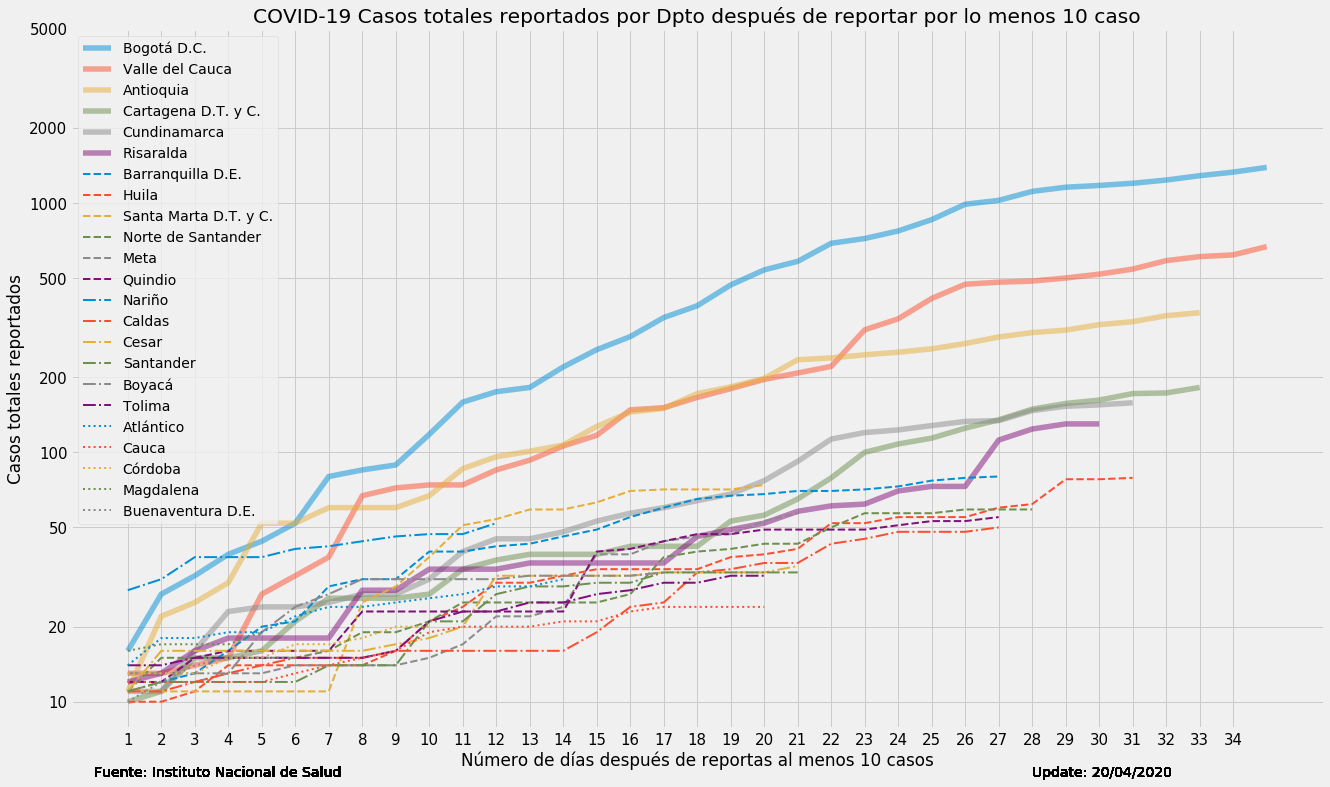

In [52]:
plot_history(total_cases, low_cases=10, high_cases=2000, max_periods=35)

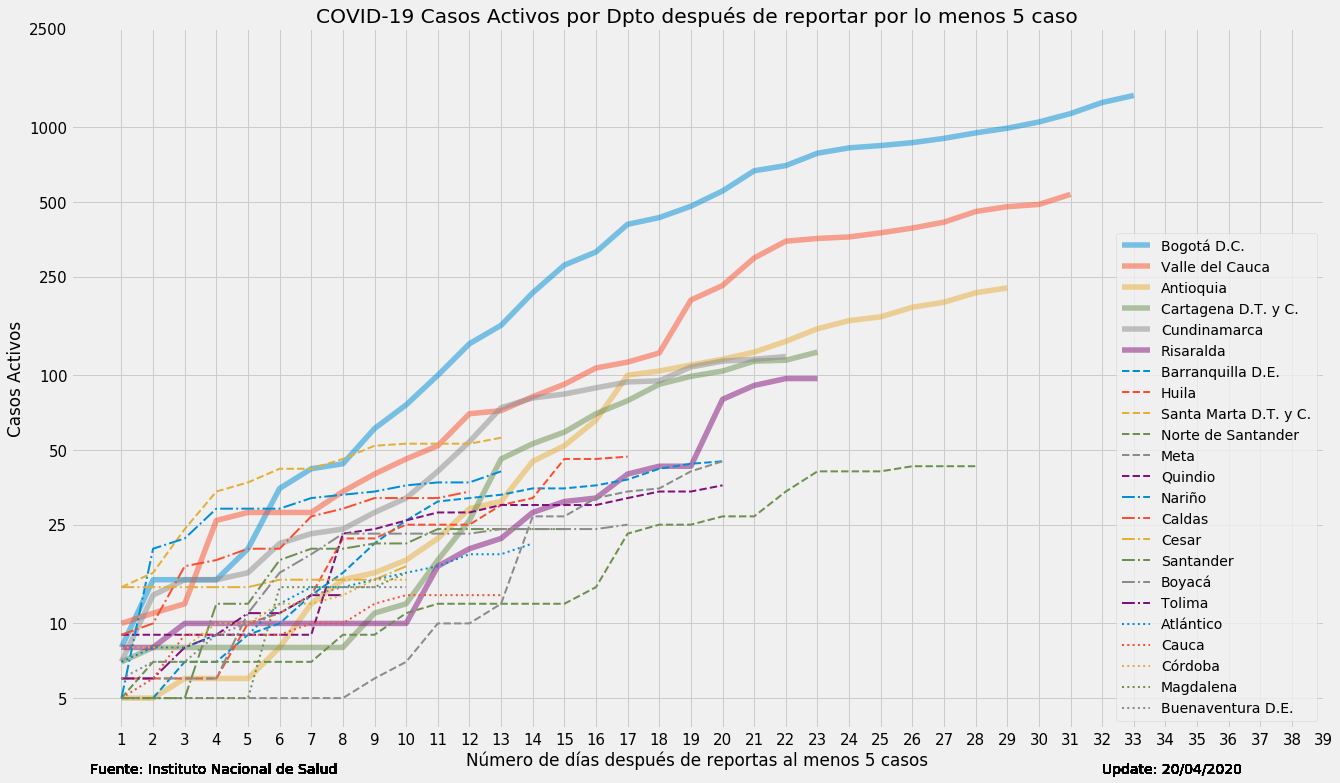

In [56]:
plot_history(active_cases, low_cases=5, high_cases=5000, max_periods=40, title="Casos Activos")

In [57]:
df

,fecha_de_notificaci_n,codigo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,fecha_de_muerte,Fecha,activos
id_de_caso,,,,,,,,,,,,,,,,,
1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27T00:00:00.000,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,NaN,2020-03-06,False
2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04T00:00:00.000,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,NaN,2020-03-09,False
3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29T00:00:00.000,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,NaN,2020-03-09,False
4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,COLOMBIA,2020-03-06T00:00:00.000,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,NaN,2020-03-11,False
5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,COLOMBIA,2020-03-08T00:00:00.000,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,NaN,2020-03-11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,2020-04-06T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,51,F,En Estudio,Leve,COLOMBIA,2020-03-15T00:00:00.000,2020-04-20T00:00:00.000,NaN,2020-04-20T00:00:00.000,NaN,2020-04-20,True
3974,2020-04-06T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,18,F,En Estudio,Leve,COLOMBIA,2020-03-28T00:00:00.000,2020-04-20T00:00:00.000,NaN,2020-04-20T00:00:00.000,NaN,2020-04-20,True
3975,2020-04-06T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,43,M,En Estudio,Leve,COLOMBIA,2020-03-15T00:00:00.000,2020-04-20T00:00:00.000,NaN,2020-04-20T00:00:00.000,NaN,2020-04-20,True


In [63]:
total_cases.index[:7]

Index(['Bogotá D.C.', 'Valle del Cauca', 'Antioquia', 'Cartagena D.T. y C.',
       'Cundinamarca', 'Risaralda', 'Barranquilla D.E.'],
      dtype='object', name='departamento')

In [64]:
top_departments = df[df['departamento'].isin(total_cases.index[:5])]

In [65]:
top_departments['Fecha'] = top_departments['Fecha'].dt.strftime('%m-%d')

/Users/camilovelasquez/anaconda3/envs/general/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


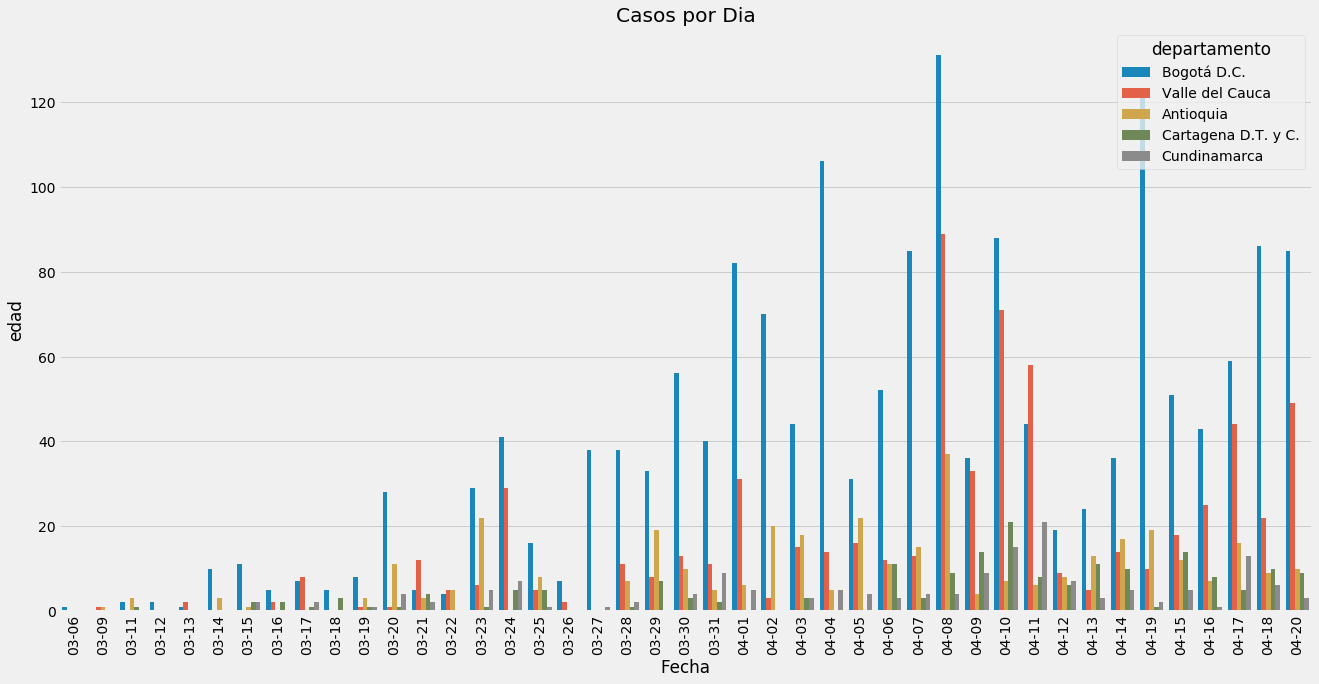

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x='Fecha', y='edad', data=top_departments, hue='departamento', estimator=len, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Casos por Dia")
plt.show()